<a href="https://colab.research.google.com/github/ramelloperalta/tf-keras-projects/blob/main/MNIST_numbersclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
mnist = tf.keras.datasets.mnist

- 70000 images of number images 28x28
- each image has 784 features (28x28), each representing pixel intensity from 0 to 255


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train[0]

5


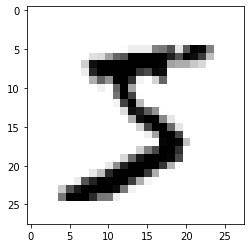

In [11]:
some_digit = X_train[0]
sd_image = some_digit.reshape(28,28)
plt.imshow(sd_image, cmap='binary')
print(y_train[0])

In [ ]:
#X_train = tf.keras.utils.normalize(X_train, axis=1)
#X_test = tf.keras.utils.normalize(X_test, axis=1)

## **Activation functions**


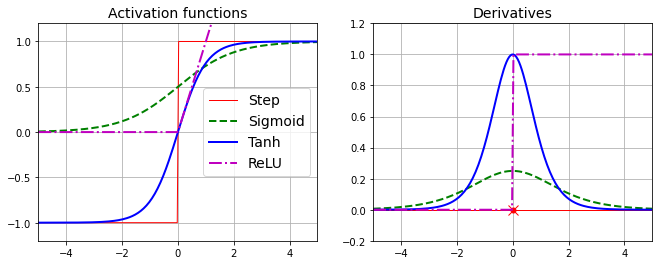

In [ ]:
#View of different activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def relu(z):
    return np.maximum(0, z)
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

##**Building models**


In [17]:
#Input layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    64, #64 neurons
    activation = tf.nn.relu #rectified linear activation function; default, we can tweak later to see differences
))
model.add(tf.keras.layers.Dense(
    64, 
    activation = tf.nn.relu 
))
model.add(tf.keras.layers.Dense(
    10, 
    activation = tf.nn.softmax
))

model.compile(optimizer='adam', #default, can also use SGD
              loss='sparse_categorical_crossentropy', #sample has multiple classes, most of them are 0(white)
              metrics=['accuracy'])

- Sequential most common model
- We want to flatten for input layers
- relu activation function outputs the input if positive, otherwise 0 
    - max(0, Z)

In [18]:
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4390 - accuracy: 0.8130
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.9042
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3177 - accuracy: 0.9205


In [20]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3388 - accuracy: 0.9243
0.3387833535671234 0.9243000149726868


##**normalized training set**

In [21]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [22]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(
    64, 
    activation = tf.nn.relu 
))
model2.add(tf.keras.layers.Dense(
    64, 
    activation = tf.nn.relu 
))
model2.add(tf.keras.layers.Dense(
    10, 
    activation = tf.nn.softmax
))

model2.compile(optimizer='adam', #default, can also use SGD
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=3)

val_loss, val_acc = model2.evaluate(X_test, y_test)
print(val_loss, val_acc)
#Better accuracy than before normalization

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.9109
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1450 - accuracy: 0.9554
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.1078 - accuracy: 0.9665
0.10781510919332504 0.9664999842643738


##**Increasing neurons**

In [23]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(
    128, 
    activation = tf.nn.relu 
))
model3.add(tf.keras.layers.Dense(
    128, 
    activation = tf.nn.relu 
))
model3.add(tf.keras.layers.Dense(
    10, 
    activation = tf.nn.softmax
))

model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=30)

val_loss, val_acc = model3.evaluate(X_test, y_test)
print(val_loss, val_acc)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2541 - accuracy: 0.9269
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.9676
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.0989 - accuracy: 0.9684
0.09892448782920837 0.9684000015258789


##**SGD optimizer**

In [25]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Flatten())

model4.add(tf.keras.layers.Dense(
    128, 
    activation = tf.nn.relu 
))
model4.add(tf.keras.layers.Dense(
    128, 
    activation = tf.nn.relu 
))
model4.add(tf.keras.layers.Dense(
    10, 
    activation = tf.nn.softmax
))

opt = tf.keras.optimizers.SGD(learning_rate=0.2)

model4.compile(optimizer=opt, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=10)

val_loss, val_acc = model4.evaluate(X_test, y_test)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2873 - accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1181 - accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0818 - accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0617 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9853
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9884
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.0953 

In [30]:
predictions = model4.predict([X_test])

In [27]:
print(np.argmax(predictions[0]))

7


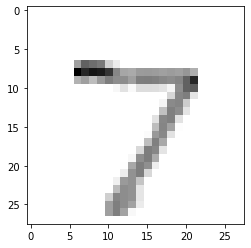

In [29]:
plt.imshow(X_test[0], cmap='binary')